<a target="_blank" href="https://colab.research.google.com/github/phitterio/phitter-kernel/blob/main/utilities/tutorials/fit_accelerate.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [1]:
import pandas
import sys
import os

In [2]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../../")

In [3]:
import phitter

In [4]:
df = pandas.read_csv("https://gist.githubusercontent.com/phitterio/6e1cdb92a5f518c7459484c619185fc5/raw/4072c5233d03204d8999943398b23c2393bcd637/iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
phitter_cont = phitter.PHITTER(data=df["SepalWidthCm"].to_numpy())
phitter_cont.fit(n_workers=2)

In [6]:
phitter_cont.best_distribution

{'id': 'generalized_normal',
 'parameters': {'beta': 1.4537012495012838,
  'mu': 3.029671298588515,
  'alpha': 0.4916783706870107}}

In [7]:
phitter_cont.df_sorted_distributions_sse

distribution passed        sse  \
                                           
0   generalized_normal      ✅   0.029975   
1             logistic      ✅   0.043406   
2                dagum      ✅   0.046718   
3              burr_4p      ✅   0.048752   
4       loglogistic_3p      ✅   0.049167   
..                 ...    ...        ...   
58      error_function      ❌   3.222930   
59                   f      ❌   3.222932   
60            loggamma      ❌   3.222932   
61         loglogistic      ❌   3.559501   
62      exponential_2p      ❌  11.918157   

                                     parameters     chi_square                 \
                                                test_statistic critical_value   
0          beta: 1.454, mu: 3.03, alpha: 0.4917       6.697746      14.067140   
1                      mu: 3.054, sigma: 0.2391       7.588424      15.507313   
2                 a: 13.29, b: 3.058, p: 0.9137       7.533057      14.067140   
3   A: 3.148, B: 12.14, C: 1.171, loc: -0.06067       6.781209      12.591587   
4       loc: -0.7182, alpha: 3.749, beta: 15.54       6.743316      14.067140   
..                                          ...            ...            ...   
58                                     h: 1.631            NaN            NaN   
59                       df1: 474.5, df2: 352.4            NaN            NaN   
60      c: 8.51e+04, mu: 4.49e-05, sigma: 0.269            NaN            NaN   
61                    alpha: 3.749, beta: 15.54    1666.873888      15.507313   
62                        lambda: 5.682, loc: 2   37340.399441      15.507313   

                      kolmogorov_smirnov                                    \
     p_value rejected     test_statistic critical_value   p_value rejected   
0   0.461014    False           0.086395       0.109714  0.200862    False   
1   0.474670    False           0.109567       0.109714  0.050493    False   
2   0.375561    False           0.084746       0.109714  0.218813    False   
3   0.341556    False           0.086829       0.109714  0.196324    False   
4   0.456086    False           0.084876       0.109714  0.217356    False   
..       ...      ...                ...            ...       ...      ...   
58       NaN     None           0.993331       0.109714  0.000000     True   
59       NaN     None           0.993333       0.109714  0.000000     True   
60       NaN     None           0.553333       0.109714  0.000000     True   
61  0.000000     True           0.660102       0.109714  0.000000     True   
62  0.000000     True           0.823721       0.109714  0.000000     True   

   anderson_darling                                   n_test_passed  \
     test_statistic critical_value   p_value rejected                 
0          0.786440        2.49359  0.490699    False             3   
1          0.875198        2.49359  0.429654    False             3   
2          0.712754        2.49359  0.548020    False             3   
3          0.662133        2.49359  0.591018    False             3   
4          0.658577        2.49359  0.594149    False             3   
..              ...            ...       ...      ...           ...   
58              NaN            NaN       NaN     None             0   
59      5305.062015        2.49359  0.000004     True             0   
60              NaN            NaN       NaN     None             0   
61       217.244527        2.49359  0.000004     True             0   
62       544.382223        2.49359  0.000004     True             0   

   n_test_null  
                
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
58           2  
59           1  
60           2  
61           0  
62           0  

[63 rows x 18 columns]

In [8]:
phitter_cont.plot_histogram()

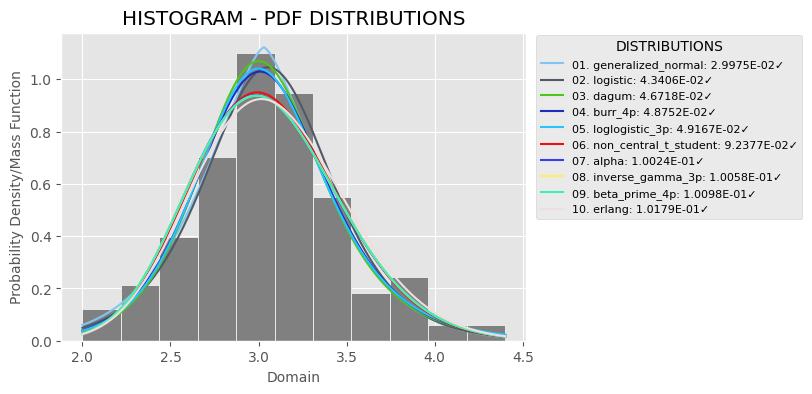

In [9]:
phitter_cont.plot_histogram_distributions(plot_engine="matplotlib")

In [ ]:
phitter_cont.plot_distribution("burr_4p", )

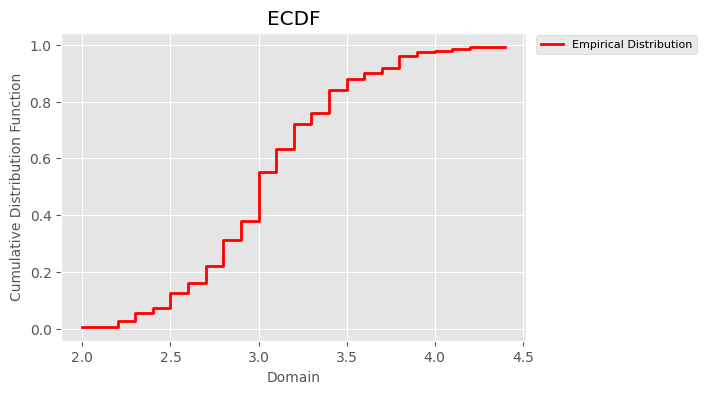

In [10]:
phitter_cont.plot_ecdf(plot_engine="matplotlib")

In [11]:
phitter_cont.plot_ecdf()

In [12]:
phitter_cont.plot_ecdf_distribution("logistic")

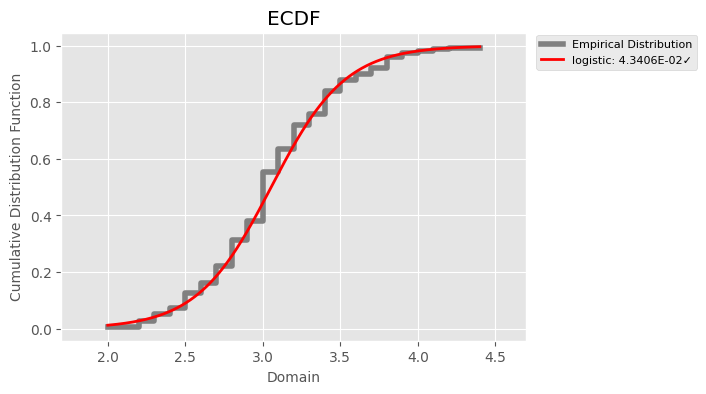

In [13]:
phitter_cont.plot_ecdf_distribution("logistic", plot_engine="matplotlib")

In [14]:
phitter_cont.plot_ecdf_distribution("logistic")

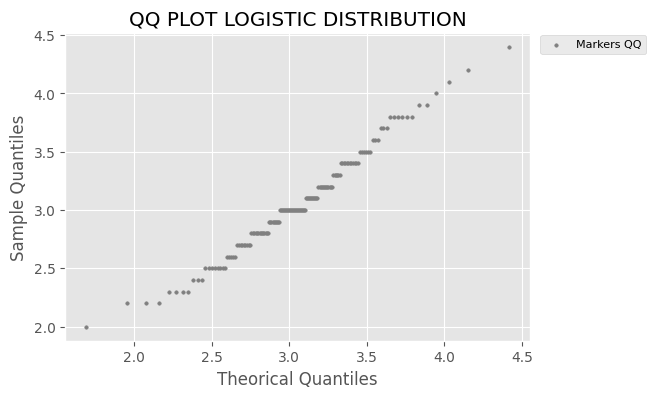

In [15]:
phitter_cont.qq_plot("logistic", plot_engine="matplotlib")

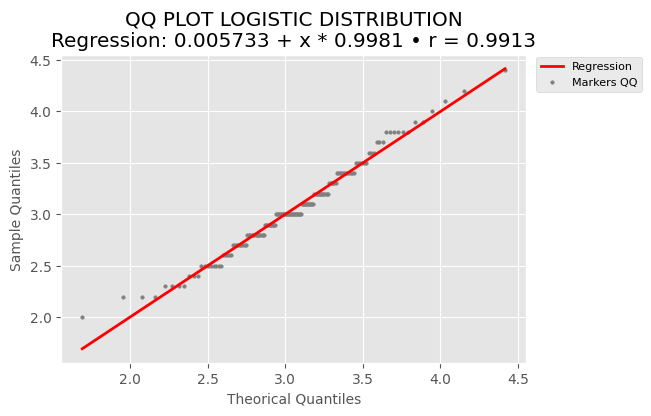

In [17]:
phitter_cont.qq_plot_regression("logistic", plot_engine="matplotlib")